In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,RandomForestRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier,XGBRegressor
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    mean_squared_error
)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv("Modified_Combined_Menstrual_Habits_Comparison.csv")
data.head()

,Age,Menstrual_Onset_Age,Generation,Dietary_Pattern,Fast_Food_Intake,Socioeconomic_Status,Physical_Activity,Environmental_Factors,Region,Sugar_Intake_Per_Day,Fiber_Intake_Per_Day,Protein_Intake_Per_Day,Processed_Food_Score,Industrialization_Level,Nutrition_Access,BMI
0,11,12,1959,Vegan,3,Low,1.1,Medium,Urban,35,26,47,8,High,Good,17.5
1,9,17,1997,Fast Food,7,Medium,1.6,Low,Urban,12,8,22,8,High,Average,16.5
2,11,17,1966,Processed,7,Medium,4.2,Medium,Rural,11,18,21,5,Moderate,Average,17.5
3,10,11,1971,Traditional,1,Medium,3.3,Low,Suburban,11,6,72,3,Low,Excellent,17.0
4,10,12,1978,Processed,5,Medium,4.3,High,Urban,31,27,33,9,Moderate,Good,17.0


In [3]:
data["Dietary_Pattern"].unique()

array(['Vegan', 'Fast Food', 'Processed', 'Traditional', 'Balanced'],
      dtype=object)

In [4]:
data["Environmental_Factors"].unique()

array(['Medium', 'Low', 'High'], dtype=object)

In [5]:
data["Nutrition_Access"].unique()

array(['Good', 'Average', 'Excellent', 'Poor'], dtype=object)

In [6]:
data["Region"].unique()

array(['Urban', 'Rural', 'Suburban'], dtype=object)

In [7]:
data["Socioeconomic_Status"].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [3]:
# Encode categorical variables
categorical_cols = ["Dietary_Pattern", "Socioeconomic_Status", "Environmental_Factors",
                    "Region", "Industrialization_Level", "Nutrition_Access"]
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Create binary target: Early (<=12 years) vs Late (>12 years)
data['Menstrual_Class'] = (data['Menstrual_Onset_Age'] <= 12).astype(int)
print(data["Nutrition_Access"].head(20))

0     2
1     0
2     0
3     1
4     2
5     0
6     2
7     0
8     2
9     0
10    2
11    3
12    1
13    3
14    1
15    1
16    0
17    3
18    1
19    2
Name: Nutrition_Access, dtype: int64


Text(0.5, 1.0, 'Distribution of Age at Menarche')

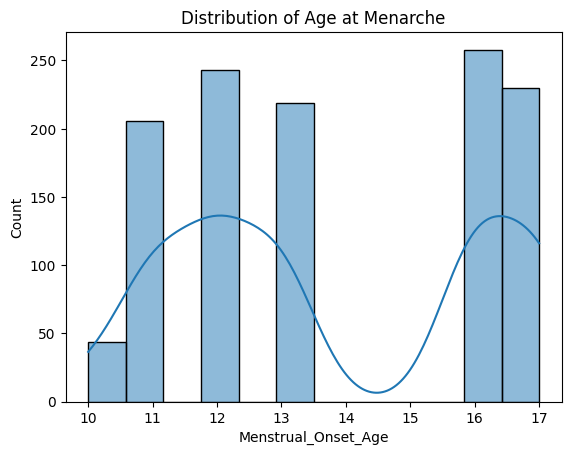

In [9]:
sns.histplot(data["Menstrual_Onset_Age"], kde=True)
plt.title("Distribution of Age at Menarche")

In [4]:
# Separate features and target
X = data.drop(columns=["Menstrual_Onset_Age", "Generation", "Menstrual_Class","Industrialization_Level"])
y = data["Menstrual_Class"]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(X)

      Age  Dietary_Pattern  Fast_Food_Intake  Socioeconomic_Status  \
0      11                4                 3                     1   
1       9                1                 7                     2   
2      11                2                 7                     2   
3      10                3                 1                     2   
4      10                2                 5                     2   
...   ...              ...               ...                   ...   
1195    8                0                 3                     2   
1196    8                0                 5                     2   
1197    8                4                 4                     1   
1198    8                2                 5                     0   
1199    8                4                 7                     1   

      Physical_Activity  Environmental_Factors  Region  Sugar_Intake_Per_Day  \
0                   1.1                      2       2                    35   

In [5]:
# Models for evaluation
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
}

metrics = []


Training and Evaluating: Logistic Regression

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.64      0.89      0.75       142
           1       0.64      0.29      0.39        98

    accuracy                           0.64       240
   macro avg       0.64      0.59      0.57       240
weighted avg       0.64      0.64      0.60       240



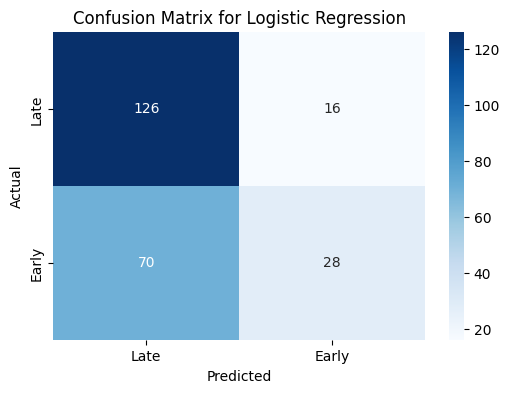

Training and Evaluating: Random Forest

Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.64      0.87      0.74       142
           1       0.62      0.30      0.40        98

    accuracy                           0.64       240
   macro avg       0.63      0.58      0.57       240
weighted avg       0.63      0.64      0.60       240



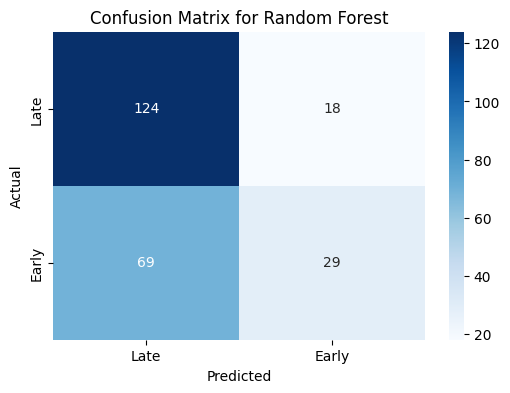

Training and Evaluating: Gradient Boosting

Classification Report for Gradient Boosting:

              precision    recall  f1-score   support

           0       0.63      0.80      0.71       142
           1       0.53      0.34      0.41        98

    accuracy                           0.61       240
   macro avg       0.58      0.57      0.56       240
weighted avg       0.59      0.61      0.59       240



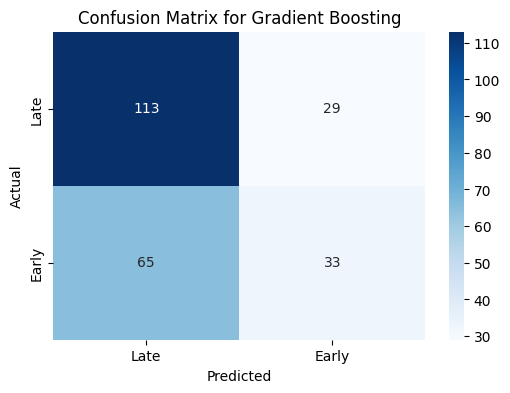

Training and Evaluating: SVM

Classification Report for SVM:

              precision    recall  f1-score   support

           0       0.64      0.92      0.76       142
           1       0.68      0.27      0.38        98

    accuracy                           0.65       240
   macro avg       0.66      0.59      0.57       240
weighted avg       0.66      0.65      0.60       240



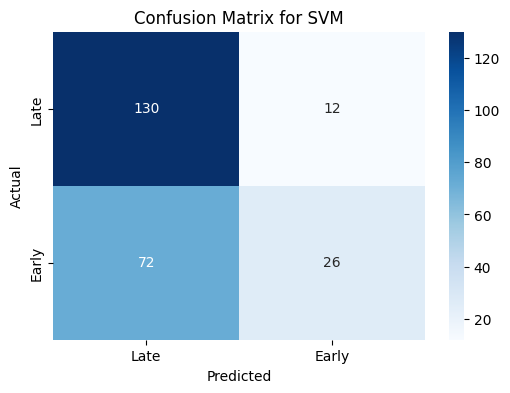

Training and Evaluating: KNN

Classification Report for KNN:

              precision    recall  f1-score   support

           0       0.63      0.72      0.67       142
           1       0.48      0.38      0.42        98

    accuracy                           0.58       240
   macro avg       0.55      0.55      0.55       240
weighted avg       0.57      0.58      0.57       240



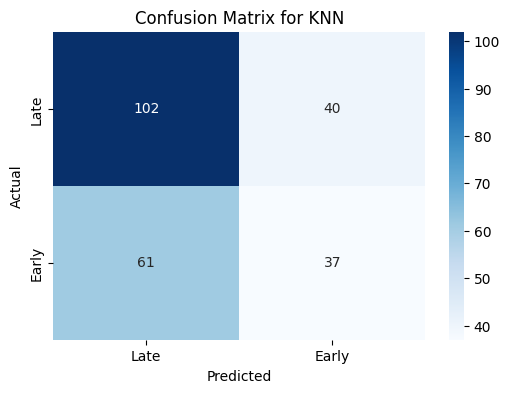

Training and Evaluating: Naive Bayes

Classification Report for Naive Bayes:

              precision    recall  f1-score   support

           0       0.66      0.82      0.73       142
           1       0.59      0.38      0.46        98

    accuracy                           0.64       240
   macro avg       0.62      0.60      0.59       240
weighted avg       0.63      0.64      0.62       240



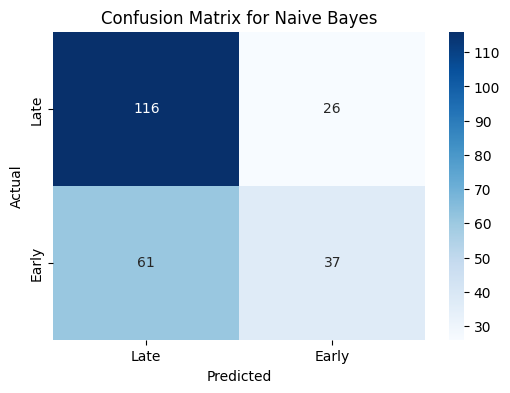

Training and Evaluating: XGBoost

Classification Report for XGBoost:

              precision    recall  f1-score   support

           0       0.63      0.73      0.67       142
           1       0.49      0.38      0.43        98

    accuracy                           0.58       240
   macro avg       0.56      0.55      0.55       240
weighted avg       0.57      0.58      0.57       240



c:\Users\Chandana H K\mini-project\backend\source\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:30:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


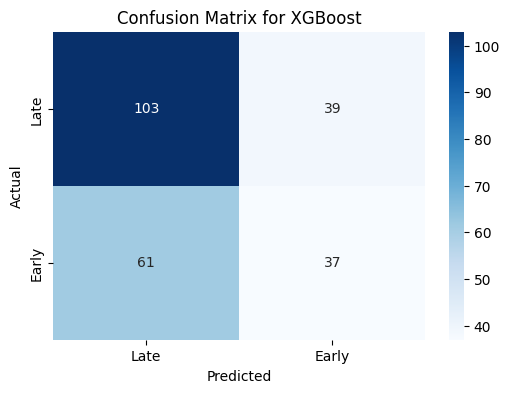

In [6]:
for model_name, model in models.items():
    print(f"Training and Evaluating: {model_name}")
    # Train the model
    model.fit(X_train, y_train)
    # Predictions
    y_pred = model.predict(X_test)
    # Metrics calculation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    # Store metrics
    metrics.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
    })
    # Display classification report
    print(f"\nClassification Report for {model_name}:\n")
    print(classification_report(y_test, y_pred))
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Late", "Early"], yticklabels=["Late", "Early"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [ ]:
print("\n📈 Training and Evaluating Regression Model")
y_age = data["Menstrual_Onset_Age"]
X_train, X_test, y_train_age, y_test_age = train_test_split(X_scaled, y_age, test_size=0.2, random_state=42)
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train_age)  # y_train_age = actual onset age

y_pred_age = regressor.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_age, y_pred_age))  # y_test_age = true ages

# Derive binary classification from predicted age
threshold = 11  # You can tune this
y_pred_class = [1 if age >= threshold else 0 for age in y_pred_age]
y_true_class = [1 if age >= threshold else 0 for age in y_test_age]

# Classification metrics from regressor
reg_accuracy = accuracy_score(y_true_class, y_pred_class)
reg_precision = precision_score(y_true_class, y_pred_class)
reg_recall = recall_score(y_true_class, y_pred_class)
reg_f1 = f1_score(y_true_class, y_pred_class)

metrics.append({
    "Model": "Random Forest Regressor (Derived Classification)",
    "Accuracy": reg_accuracy,
    "Precision": reg_precision,
    "Recall": reg_recall,
    "F1 Score": reg_f1,
    "RMSE (age)": rmse
})

# === Final Results ===
df_metrics = pd.DataFrame(metrics)
print("\n📊 Final Evaluation Metrics:\n")
print(df_metrics)


📈 Training and Evaluating Regression Model

📊 Final Evaluation Metrics:

                                               Model  Accuracy  Precision  \
0                                Logistic Regression  0.641667   0.636364   
1                                      Random Forest  0.637500   0.617021   
2                                  Gradient Boosting  0.608333   0.532258   
3                                                SVM  0.650000   0.684211   
4                                                KNN  0.579167   0.480519   
5                                        Naive Bayes  0.637500   0.587302   
6                                            XGBoost  0.583333   0.486842   
7   Random Forest Regressor (Derived Classification)  0.654167   0.648241   
8   Random Forest Regressor (Derived Classification)  0.779167   0.829384   
9   Random Forest Regressor (Derived Classification)  0.541667   0.454545   
10  Random Forest Regressor (Derived Classification)  0.954167   0.962185   
11

In [16]:
import math
# def predict_onset(sample, regressor, scaler, classifier):
#     sample_scaled = scaler.transform([sample])
#     predicted_age = regressor.predict(sample_scaled)[0]
#     predicted_class = classifier.predict([[9,1,7,2,1.6,1,2,12,8,22,8,0]])[0]
#     label = "Late" if predicted_class == 1 else "Early"
#     return predicted_age, label
def predict_onset(sample, regressor, scaler, classifier):
    sample_scaled = scaler.transform([sample])
    predicted_age = regressor.predict(sample_scaled)[0]
    predicted_class = classifier.predict([sample])[0] 
    label = "Late" if predicted_class == 1 else "Early"
    return predicted_age, label
best_classifier = models["Naive Bayes"]
age,label = predict_onset([9,1,7,2,1.6,1,2,12,8,22,8,0,16.5],regressor,scaler,best_classifier)
print(f"Predicted Age: {math.ceil(age):.2f} years | Category: {label}")

Predicted Age: 17.00 years | Category: Late


c:\Users\Chandana H K\mini-project\backend\source\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [14]:
import joblib

joblib.dump(regressor, 'regressor.pkl')
joblib.dump(best_classifier, 'classifier.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']